# Credit Card Fraud Detection Using Machine Learning

# Aim 

The aim of this project is to develop predictive models for identifying fraudulent credit card transactions using historical transaction data. By leveraging machine learning techniques, the project seeks to provide accurate fraud detection, helping financial institutions minimize monetary losses and enhance transaction security.

# Abstract

This dataset contains anonymized credit card transaction records, including numerical features derived from transaction activity, transaction amounts, and timestamps. It includes both legitimate and fraudulent transactions. Machine learning models are applied to this dataset to detect fraud patterns and predict the likelihood of fraud for new transactions, aiming to improve detection accuracy and support real-time financial security.

# Description

The dataset provides detailed information about credit card transactions, including 28 anonymized features (V1–V28), transaction amount, and the time elapsed since the first recorded transaction. Each record is labeled as either legitimate or fraudulent. This dataset can be used to analyze transaction behavior, train machine learning models, and implement a fraud detection system that enhances security and supports real-time decision-making in financial institutions.

# Column Summary

Time – Represents the elapsed time in seconds between each transaction and the first recorded transaction. Useful for analyzing temporal patterns in transactions.

V1–V28 – Anonymized numerical features representing various characteristics of the transaction (original features have been transformed using PCA to protect privacy).

Amount – The monetary value of the transaction, helpful for understanding the scale of spending and detecting unusually large transactions.

Class – The target variable, where 0 indicates a legitimate transaction and 1 indicates a fraudulent transaction.

#

## Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

# SMOTE
from imblearn.over_sampling import SMOTE


## Loading the Credit Card Transactions Dataset

In [2]:
df = pd.read_csv("creditcard.csv")
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

## Dataset Overview

In [3]:
print(df.shape)

(284807, 31)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## Checking for Missing Values

In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
print(df['Class'].value_counts())

Class
0    284315
1       492
Name: count, dtype: int64


## Class Distribution (Fraud vs Legitimate Transactions)

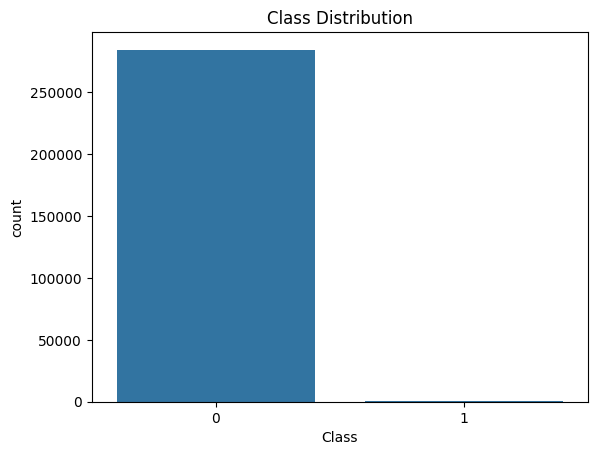

In [7]:
# Class distribution
sns.countplot(x='Class', data=df)
plt.title("Class Distribution")
plt.show()


## Splitting Features and Target Variable

In [8]:
x = df.drop('Class', axis=1)
y = df['Class']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

## Splitting Data into Training and Testing Sets

In [9]:
scaler = StandardScaler()
xtrain_scaled = scaler.fit_transform(xtrain)
xtest_scaled = scaler.transform(xtest)


## SMOTE

In [10]:
smote = SMOTE(random_state=42)
xtrain_sm, ytrain_sm = smote.fit_resample(xtrain_scaled, ytrain)
print(pd.Series(ytrain_sm).value_counts())


Class
0    227451
1    227451
Name: count, dtype: int64


## Logistic Regression Model

In [11]:
logreg = LogisticRegression()
logreg.fit(xtrain_sm, ytrain_sm)

ypred_lr = logreg.predict(xtest_scaled)

print("Logistic Regression Accuracy:", accuracy_score(ytest, ypred_lr))
print(classification_report(ytest, ypred_lr))


Logistic Regression Accuracy: 0.9741055440469084
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962



## Decision Tree Classifier Model

In [12]:
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(xtrain_sm, ytrain_sm)

ypred_dt = dtree.predict(xtest_scaled)

print("Decision Tree Accuracy:", accuracy_score(ytest, ypred_dt))
print(classification_report(ytest, ypred_dt))


Decision Tree Accuracy: 0.997559776693234
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.39      0.79      0.53        98

    accuracy                           1.00     56962
   macro avg       0.70      0.89      0.76     56962
weighted avg       1.00      1.00      1.00     56962



## Random Forest Classifier Model

In [13]:
rforest = RandomForestClassifier(n_estimators=50, max_depth=8, random_state=42)
rforest.fit(xtrain_sm, ytrain_sm)

ypred_rf = rforest.predict(xtest_scaled)

print("Random Forest Accuracy:", accuracy_score(ytest, ypred_rf))
print(classification_report(ytest, ypred_rf))

Random Forest Accuracy: 0.9966644429619747
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.33      0.88      0.48        98

    accuracy                           1.00     56962
   macro avg       0.66      0.94      0.74     56962
weighted avg       1.00      1.00      1.00     56962



## K-Nearest Neighbors (KNN) Model

In [14]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain_sm, ytrain_sm)

ypred_knn = knn.predict(xtest_scaled)

print("KNN Accuracy:", accuracy_score(ytest, ypred_knn))
print(classification_report(ytest, ypred_knn))

KNN Accuracy: 0.9978406657069625
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.44      0.88      0.58        98

    accuracy                           1.00     56962
   macro avg       0.72      0.94      0.79     56962
weighted avg       1.00      1.00      1.00     56962



## Linear Support Vector Machine (Linear SVM) Model

In [15]:
svm = LinearSVC(max_iter=20000, C=0.1, random_state=42)
svm.fit(xtrain_sm, ytrain_sm)

ypred_svm = svm.predict(xtest_scaled)

print("Linear SVM Accuracy:", accuracy_score(ytest, ypred_svm))
print(classification_report(ytest, ypred_svm))

Linear SVM Accuracy: 0.9772831010147116
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.91      0.12        98

    accuracy                           0.98     56962
   macro avg       0.53      0.94      0.55     56962
weighted avg       1.00      0.98      0.99     56962



## Model Evaluation and Performance Comparison

In [22]:
import pandas as pd
from sklearn.metrics import accuracy_score

# Create list for table rows
results = []

# Add each model and its accuracy
results.append(["Logistic Regression", accuracy_score(ytest, ypred_lr)])
results.append(["Random Forest", accuracy_score(ytest, ypred_rf)])
results.append(["Decision Tree", accuracy_score(ytest, ypred_dt)])
results.append(["KNN", accuracy_score(ytest, ypred_knn)])
results.append(["Linear SVM", accuracy_score(ytest, ypred_svm)])

# Convert to DataFrame (simple table)
comparison = pd.DataFrame(results, columns=["Model", "Accuracy"])

# Show table
comparison


,Model,Accuracy
0,Logistic Regression,0.974106
1,Random Forest,0.996664
2,Decision Tree,0.997560
3,KNN,0.997841
4,Linear SVM,0.977283


## Conclusion

K-Nearest Neighbors (KNN) - Accuracy: 99.78% (Highest)
KNN achieves the highest accuracy among all tested models, showing excellent capability in pattern recognition.
With proper scaling and parameter tuning, it becomes a powerful non-parametric option for fraud detection.

Decision Tree - Accuracy: 99.75%
The Decision Tree model performs exceptionally well, delivering high accuracy with a clear and intuitive structure.
Its simplicity and transparency make it ideal for explaining classification paths to stakeholders.

Random Forest - Accuracy: 99.66%
Random Forest achieves outstanding accuracy, effectively capturing complex, non-linear relationships in the dataset.
Its robustness and resistance to overfitting make it a highly dependable choice for real-world fraud detection tasks.

Linear SVM - Accuracy: 97.72%
Linear SVM delivers strong generalization performance with competitive accuracy across balanced and unbalanced data.
Its ability to handle high-dimensional feature spaces makes it reliable for classification in complex datasets.

Logistic Regression - Accuracy: 97.41%
Logistic Regression demonstrates strong and consistent performance, making it a reliable baseline classifier.
Its interpretability and efficiency make it valuable for understanding feature influence and quick deployment.